In [1]:
%matplotlib inline
import pandas as pd
import os

In [2]:
runnum = 12
endyear = 2021
h5_location = './../runs/run{}.h5'.format(runnum)

In [3]:
store = pd.HDFStore(h5_location)
parcels_lid = store['base/parcels'][['large_area_id']]
lids = parcels_lid.large_area_id.unique()
years = range(2016, endyear + 1)

In [4]:
def filterdf(df, use):
    if use=='res':
        return df.loc[(df.residential_units > 0)
                      & (df.non_residential_sqft == 0)]
    elif use=='nonres':
        return df.loc[(df.residential_units == 0)
                      & (df.non_residential_sqft > 0)]
    elif use=='mixed':
        return df.loc[(df.residential_units > 0)
                      & (df.non_residential_sqft > 0)]
    else:
        return df

In [5]:
results = pd.DataFrame(index=parcels_lid.large_area_id.unique())

for use in ['res', 'nonres', 'mixed', 'total']:
    for year in years:
        buildings_name = '{}/buildings'.format(year)
        buildings = store[buildings_name]
        buildings = filterdf(buildings, use)
        b = buildings[['year_built', 'parcel_id']]
        b = b.merge(parcels_lid, left_on='parcel_id', right_index=True)
        b = b.loc[b.year_built == year]
        built_by_lid = b.groupby('large_area_id').count().year_built
        results[year] = built_by_lid
    results.to_csv('run{}_{}.csv'.format(runnum, use))

In [6]:
total = pd.read_csv('run{}_total.csv'.format(runnum), index_col=0)

In [7]:
total

,2016,2017,2018,2019,2020,2021
5,NaN,19,6,NaN,NaN,NaN
3,NaN,113,57,63.0,101.0,79.0
125,718.0,1059,880,822.0,784.0,748.0
99,NaN,260,297,353.0,370.0,212.0
161,145.0,346,296,300.0,397.0,408.0
115,NaN,18,11,NaN,4.0,8.0
147,NaN,36,34,20.0,16.0,18.0
93,62.0,205,195,103.0,190.0,132.0


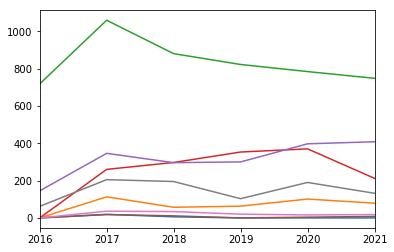

In [8]:
for l in lids:
    total.fillna(0).loc[l].plot()

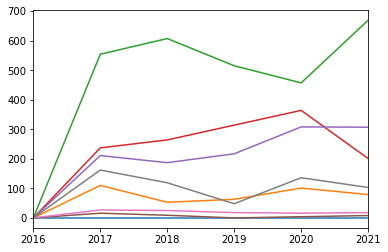

In [9]:
res = pd.read_csv('run{}_res.csv'.format(runnum), index_col=0)
for l in lids:
    res.fillna(0).loc[l].plot()

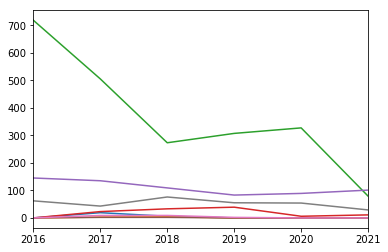

In [10]:
nonres = pd.read_csv('run{}_nonres.csv'.format(runnum), index_col=0)
for l in lids:
    nonres.fillna(0).loc[l].plot()

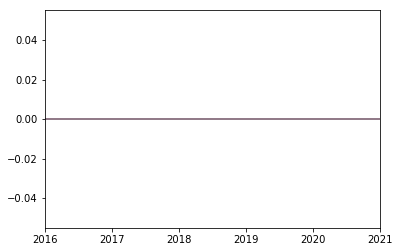

In [11]:
mixed = pd.read_csv('run{}_mixed.csv'.format(runnum), index_col=0)
for l in lids:
    mixed.fillna(0).loc[l].plot()

In [12]:
b2020 = store['2020/buildings']

In [13]:
b2020.year_built.value_counts(sort=False)

0       379536
1644         2
1656         2
1690         1
1760         1
1780         2
1790         5
1791         1
1795         4
1800       215
1803         8
9999        19
1805         2
1806         2
1807         1
1808         8
1810        22
1811         8
1812         1
1813         1
1814         1
1816         2
1818         5
1819         5
1820        42
1821        16
1822        22
1823        15
1824         8
1825        19
         ...  
1991     13875
1992     13798
1993     14128
1994     16217
1995     17113
1996     18982
1997     19411
1998     20308
1999     19941
2000     19945
2001     16655
2002     16104
2003     16179
2004     15382
2005     13434
2006      7675
2007      4184
2008       316
2009       190
2010      2312
2011      3012
2012      4274
2013      5692
2014      5028
2015      5146
2016       925
2017      2056
2018      1776
2019      1661
2020      1862
Name: year_built, Length: 225, dtype: int64